In [24]:
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import matplotlib.pyplot as plt

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

DATA_DIR = os.path.join(
    path,
    "asl_alphabet_train",
    "asl_alphabet_train"
)

Path to dataset files: C:\Users\Windows\.cache\kagglehub\datasets\grassknoted\asl-alphabet\versions\1


# Load model

In [26]:
loaded_model = keras.models.load_model("asl_alphabet_model.h5")
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,454,084 (9.36 MB)

 Trainable params: 2,454,082 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [27]:
IMG_SIZE = 64
BATCH_SIZE = 128

In [28]:
datagen = ImageDataGenerator(
    rescale = 1./255, #Chuyển đổi giá trị [0,255] vê [0,1]
    validation_split=0.2 #Chia dữ liệu thanh 80% train và 20% la validation
)

train_data = datagen.flow_from_directory(
    path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset='training' #Chỉ định lấy tập train
)

val_data = datagen.flow_from_directory(
    path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset='validation' #Chỉ định lấy tập validation
)

class_names = train_data.class_indices
class_names = dict((v,k) for k, v in class_names.items()) #Đảo ngược key và value
print(class_names)

Found 69623 images belonging to 2 classes.
Found 17405 images belonging to 2 classes.
{0: 'asl_alphabet_test', 1: 'asl_alphabet_train'}


In [29]:
from glob import glob
# Đi qua tất cả file trong thư muc file
test_images = glob(os.path.join(path, 'asl_alphabet_test', "asl_alphabet_test", "*.jpg"))
test_images[:5] #In ra 5 file đầu tiên

['C:\\Users\\Windows\\.cache\\kagglehub\\datasets\\grassknoted\\asl-alphabet\\versions\\1\\asl_alphabet_test\\asl_alphabet_test\\A_test.jpg',
 'C:\\Users\\Windows\\.cache\\kagglehub\\datasets\\grassknoted\\asl-alphabet\\versions\\1\\asl_alphabet_test\\asl_alphabet_test\\B_test.jpg',
 'C:\\Users\\Windows\\.cache\\kagglehub\\datasets\\grassknoted\\asl-alphabet\\versions\\1\\asl_alphabet_test\\asl_alphabet_test\\C_test.jpg',
 'C:\\Users\\Windows\\.cache\\kagglehub\\datasets\\grassknoted\\asl-alphabet\\versions\\1\\asl_alphabet_test\\asl_alphabet_test\\D_test.jpg',
 'C:\\Users\\Windows\\.cache\\kagglehub\\datasets\\grassknoted\\asl-alphabet\\versions\\1\\asl_alphabet_test\\asl_alphabet_test\\E_test.jpg']

# Dự đoán

In [30]:
%matplotlib inline

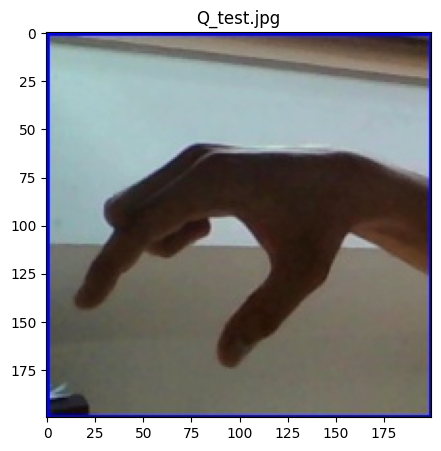

In [31]:
# Vẽ hình ảnh
import cv2
test_img_path = test_images[17]
img = cv2.imread(test_img_path)
plt.rcParams['figure.figsize'] = [5,5]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(test_img_path.split("\\")[-1])
plt.show()

In [33]:
# img_path = input("Enter the path of the image to predict: ")
img = image.load_img(test_img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # scale anh
img_array = np.expand_dims(img_array, axis=0)  # them kich thuoc

#Dự đoán
predictions = loaded_model.predict(img_array)
predicted_index = np.argmax(predictions)
predicted_label = class_names[predicted_index] #map index -> label

#print  % các lớp dự đoán
print(predictions)
print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[1.5893471e-05 9.9998415e-01]]
Predicted label: asl_alphabet_train
